In [1]:
from sklearn.datasets import  make_classification

In [2]:
x,y = make_classification(n_samples=2500, n_features=2, n_redundant=0,n_classes=2, class_sep=1.5)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as  np

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


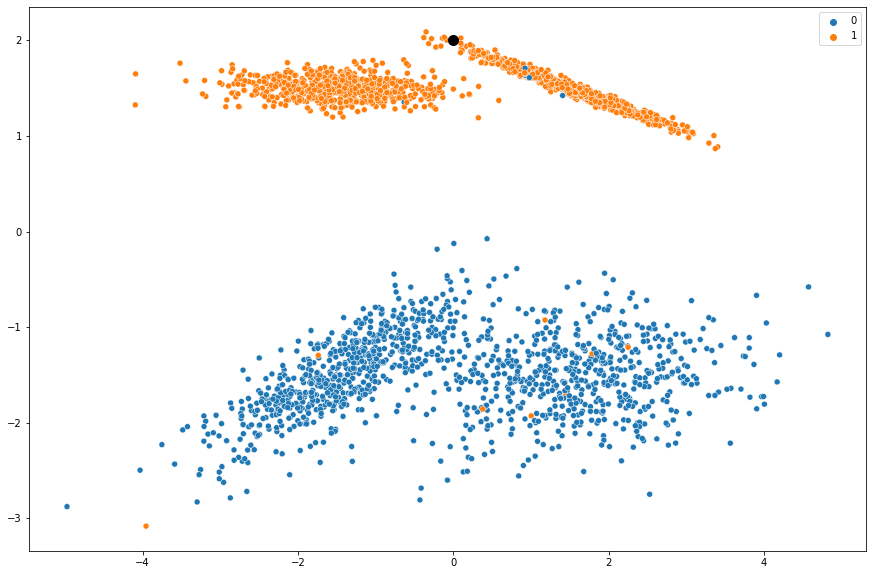

In [4]:

plt.figure(figsize=(15,10))
#plt.scatter(x[:,0], x[:,1], c=y)

sns.scatterplot(x[:,0], x[:,1], hue=y)
plt.scatter(0,2, c='black', s=100)

In [5]:
def knn(x,y,k,point):
  tot_dis = []
  for i in range(x.shape[0]):
    #1
    dis = np.sqrt((x[i][0] - point[0])  ** 2 + (x[i][1] - point[1]) ** 2)

    #2

    tot_dis.append([dis, y[i]])

  #3
  tot_dis.sort()

  #4 
  tot_dis = tot_dis[ : k]

  #5
  c0, c1 = 0, 0 
  for j in range(k):
    if tot_dis[j][1] == 0:
      c0 += 1
    else:
      c1 += 1
  
  #6 
  return 1 if c1 > c0 else 0




In [6]:
knn(x,y,10, (0,2))

1

In [7]:
from sklearn.neighbors import KNeighborsClassifier
z = KNeighborsClassifier(n_neighbors= int(np.sqrt(x.shape[0])))
z.fit(x,y)
z.predict(np.array([0,2]).reshape(1,-1))[0]


1

In [9]:
import pickle as pk

pk.dump(z, open('model.pkl', 'wb'))